In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
car_df=pd.read_csv('CAR DETAILS.csv')
car_df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
car_df.shape

(4340, 8)

In [4]:
car_df.isnull().sum()


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
car_df.duplicated().sum()


763

In [6]:
car_df.shape


(4340, 8)

In [7]:
car_df.drop_duplicates(inplace= True)


In [8]:
car_df.shape


(3577, 8)

In [9]:
car_df.dtypes


name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [10]:
## create new column of car brand name 

car_df['brand name']=car_df['name'].str.split(' ').str.slice(0,1).str.join('')
car_df


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [11]:
## change the name of column 


car_df['name']=car_df['name'].str.split(' ').str.slice(0,3).str.join(' ')
car_df.rename(columns={'name':'Model name'},inplace=True)
car_df.drop('Model name',axis=1,inplace=True)


In [12]:
## Modify the sequce of columns 
car_df=car_df.iloc[:,[7,0,1,2,3,4,5,6]]
car_df


,brand name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [13]:
car_df.columns


Index(['brand name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [14]:
cat_cols=car_df.dtypes[car_df.dtypes=='object'].index
num_cols=car_df.dtypes[car_df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['brand name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['year', 'selling_price', 'km_driven'], dtype='object')


## EDA

In [15]:
car_df.describe()


,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [16]:
car_df[car_df['km_driven']>300000]


,brand name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
69,Chevrolet,2010,280000,350000,Diesel,Individual,Manual,Second Owner
525,Maruti,2016,665000,560000,Diesel,Dealer,Manual,First Owner
1243,Maruti,2009,250000,806599,Petrol,Dealer,Manual,First Owner
1674,Volkswagen,2011,350000,312000,Diesel,Individual,Manual,Third Owner
2394,Toyota,2009,350000,350000,Diesel,Individual,Manual,First Owner
3679,Toyota,2006,400000,400000,Diesel,Individual,Manual,Third Owner
3718,Toyota,2009,420000,347089,Diesel,Dealer,Manual,First Owner


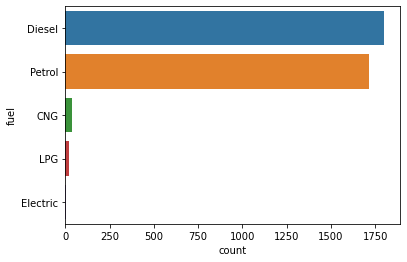

In [17]:
## Count of car based on fuel types 

import seaborn as sns 

sns.countplot(y=car_df['fuel'],order=car_df['fuel'].value_counts().sort_values(ascending=False).index)
plt.show()


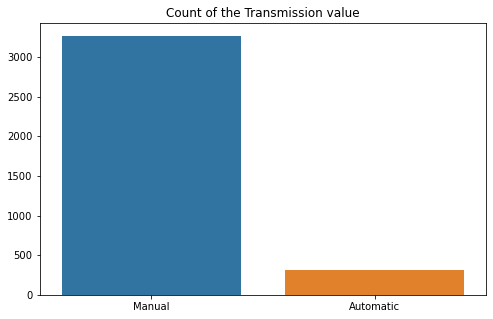

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x=car_df['transmission'].value_counts().index,y=car_df['transmission'].value_counts().values)
plt.title('Count of the Transmission value')
plt.show()


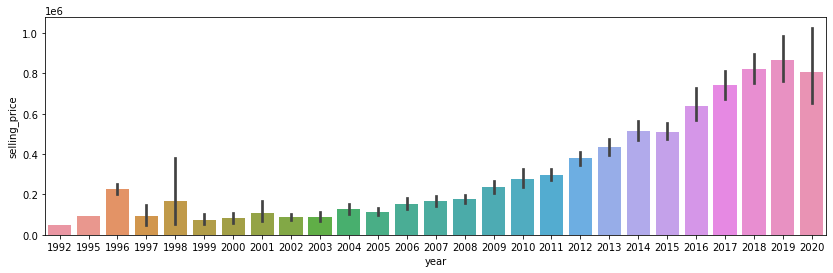

In [19]:
plt.figure(figsize=(14,4))
sns.barplot(data=car_df,x='year',y='selling_price')
plt.show()


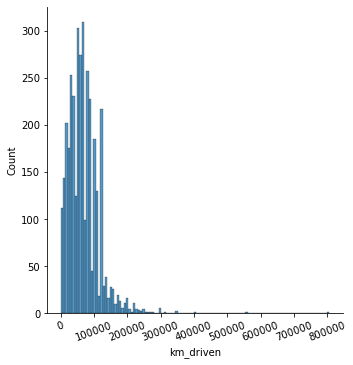

In [20]:
sns.displot(data=car_df,x='km_driven')
plt.xticks(rotation=20)
plt.show()


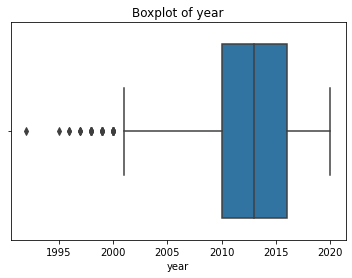

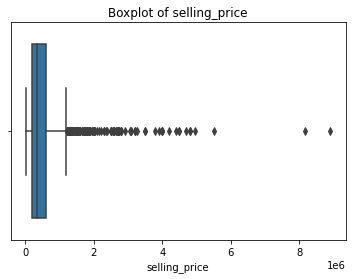

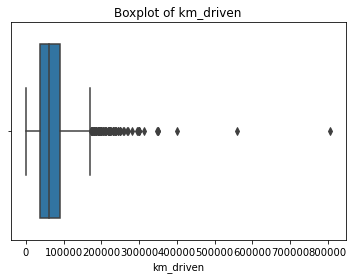

In [21]:
##Boxplot for numerical cols

for i in num_cols:
    sns.boxplot(x=car_df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()
    


In [22]:
## Handling the outliers for selling price 
car_df=car_df[car_df['selling_price']<1.04e6].reset_index(drop=True)
car_df.shape

(3341, 8)

In [23]:
car_df=car_df[car_df['km_driven']<400000].reset_index(drop=True)
car_df.shape

(3338, 8)

In [24]:
car_df=car_df[car_df['year']>1998].reset_index(drop=True)
car_df.shape

(3322, 8)

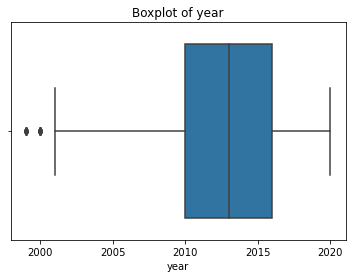

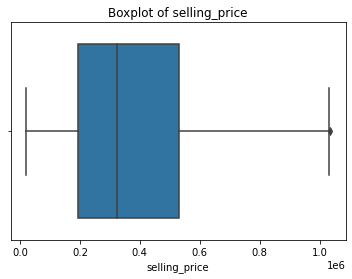

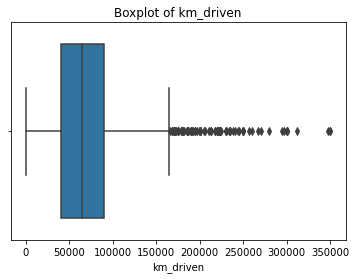

In [25]:
##Boxplot for numerical cols

for i in num_cols:
    sns.boxplot(x=car_df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()
 

In [26]:
car_df.describe()


,year,selling_price,km_driven
count,3322.000000,3.322000e+03,3322.000000
mean,2012.807947,3.783706e+05,70284.270319
std,4.110835,2.329119e+05,44975.235805
min,1999.000000,2.000000e+04,1.000000
25%,2010.000000,1.950000e+05,40000.000000
50%,2013.000000,3.250000e+05,64606.500000
75%,2016.000000,5.300000e+05,90000.000000
max,2020.000000,1.035000e+06,350000.000000


## Selecting Dependent and independent Features


In [27]:
x=car_df.drop(['selling_price'],axis=1)
y=car_df['selling_price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3322, 7)
(3322,)


In [28]:
from sklearn.model_selection import train_test_split


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2491, 7)
(831, 7)
(2491,)
(831,)


## Evaluate problem of regression model


In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [31]:
def eval_model(ytest,ypred):
    mae=mean_absolute_error(ytest,ypred)
    mse=mean_squared_error(ytest,ypred)
    rmse=np.sqrt(mse)
    r2s=r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_SCORE',r2s)
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train)) # Trainng R2 score
    print('Testing Score',model.score(x_test,y_test))    # Test R2 Score

In [32]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [34]:
print(car_df.columns)
print(cat_cols)   ##[0,3,4,5,6] 
print(x_train.columns)

Index(['brand name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')
Index(['brand name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['brand name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


## 1) Linear Regression


In [35]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,3,4,5,6])],
                    remainder='passthrough')

s2=LinearRegression()

pipe_lr=Pipeline([('s1',s1),('s2',s2)])

pipe_lr.fit(x_train,y_train)
ypred_lr=pipe_lr.predict(x_test)
eval_model(y_test,ypred_lr)

MAE 105102.32264600892
MSE 18632532321.10004
RMSE 136501.03413930623
R2_SCORE 0.6663074129920203


## 2)Ridge Regression


In [36]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,3,4,5,6])],
                    remainder='passthrough')

s2=Ridge(alpha=4)

pipe_ridge=Pipeline([('s1',s1),('s2',s2)])

pipe_ridge.fit(x_train,y_train)
ypred_ridge=pipe_ridge.predict(x_test)
eval_model(y_test,ypred_ridge)

MAE 106184.4105731353
MSE 19166842454.84922
RMSE 138444.36591948848
R2_SCORE 0.6567383792330698


## 3)Lasso Regression

In [37]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,3,4,5,6])],
                    remainder='passthrough')

s2=Lasso(alpha=7)

pipe_lasso=Pipeline([('s1',s1),('s2',s2)])

pipe_lasso.fit(x_train,y_train)
ypred_lasso=pipe_lasso.predict(x_test)
eval_model(y_test,ypred_lasso)

MAE 105090.87017546647
MSE 18640294483.4717
RMSE 136529.46379251513
R2_SCORE 0.6661683993572691


## 4) KNN Regression


In [38]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,3,4,5,6])],
                    remainder='passthrough')

s2=KNeighborsRegressor(n_neighbors=7)

pipe_knn=Pipeline([('s1',s1),('s2',s2)])

pipe_knn.fit(x_train,y_train)
ypred_knn=pipe_knn.predict(x_test)
eval_model(y_test,ypred_knn)

MAE 137622.0268179474
MSE 33325722131.001106
RMSE 182553.340509017
R2_SCORE 0.40316505345816045


## 5) DT Regression


In [39]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,3,4,5,6])],
                    remainder='passthrough')

s2=DecisionTreeRegressor(criterion='squared_error',max_depth=10,min_samples_split=15)

pipe_dtr=Pipeline([('s1',s1),('s2',s2)])

pipe_dtr.fit(x_train,y_train)
ypred_dtr=pipe_dtr.predict(x_test)
eval_model(y_test,ypred_dtr)


MAE 102446.20910630451
MSE 19331824037.98268
RMSE 139038.92993684424
R2_SCORE 0.653783701343037


## 6) RF Regression

In [40]:
s1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,3,4,5,6])],
                    remainder='passthrough')

s2=RandomForestRegressor(n_estimators=100,criterion='squared_error',max_depth=10,min_samples_split=15,random_state=5)

pipe_rfr=Pipeline([('s1',s1),('s2',s2)])

pipe_rfr.fit(x_train,y_train)
ypred_rfr=pipe_rfr.predict(x_test)
eval_model(y_test,ypred_rfr)

MAE 95450.89004222024
MSE 16815953282.64613
RMSE 129676.34048910438
R2_SCORE 0.6988407771316707


### Inference
 RF Reg is the best model in terms of R2_Score and RMSE.

In [41]:
import pickle

In [42]:
pickle.dump(pipe_rfr,open('rf.pkl','wb'))  # wb= write binary
pickle.dump(car_df,open('car_df.pkl','wb'))  # wb= write binary